**Import Libraries**

In [272]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder

**Load Dataset**

In [273]:
# Load the dataset
data = pd.read_csv('survey lung cancer.csv')

data.shape

(309, 16)

In [274]:
# Display number of rows and columns
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 309
Number of columns: 16


In [275]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


**Label Encoding of Categorical Columns**

In [276]:
# Encode categorical variables
label_encoder = LabelEncoder()
# f change to 0 and m change to 1
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])

#The LUNG_CANCER column is converted to binary (1 for 'YES' and 0 for 'NO').
data['LUNG_CANCER'] = data['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)


In [277]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


**Checking and filling missing value**

In [278]:
# Check for missing values
print("Checking for missing values...")
print(data.isnull().sum())

# Handling missing values (if any) - here we'll fill missing values with the mean of the column
data.fillna(data.mean(), inplace=True)


Checking for missing values...
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


**Checking data is balanced or not**

In [279]:
# Checking if the dataset is balanced
target_column = 'LUNG_CANCER'
target_counts = data[target_column].value_counts()
print(f'Target counts:\n{target_counts}')

Target counts:
LUNG_CANCER
1    270
0     39
Name: count, dtype: int64


In [280]:
# Checking balance
if target_counts.min() / target_counts.max() < 0.5:
    print("The dataset is not balanced. \nBalancing the dataset using SMOTE.")
    smote = SMOTE(random_state=42)
else:
    print("The dataset is balanced.")
    smote = None

The dataset is not balanced. 
Balancing the dataset using SMOTE.


**features and target**

In [281]:
X = data.drop(columns=[target_column])
y = data[target_column]

In [282]:
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [283]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

**Spliting the data**

In [284]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Preprocess the data**

In [285]:
# Preprocess the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**If the dataset is not balanced, apply SMOTE to the training data**

In [286]:
if smote:
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("After balancing, the new target counts are:")
    print(pd.Series(y_train).value_counts())

After balancing, the new target counts are:
LUNG_CANCER
1    210
0    210
Name: count, dtype: int64


**Model Training**

In [287]:
models = {
    "Logistic Regression": GridSearchCV(LogisticRegression(max_iter=1000), param_grid={'C': [0.1, 1, 10]}, cv=5),
    "Decision Tree": GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': [3, 5, 7, 10]}, cv=5),
    "SVC": GridSearchCV(SVC(), param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}, cv=5),
    "Random Forest": GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': [100, 200], 'max_depth': [5, 10]}, cv=5),
 
}

In [288]:
# Train models and evaluate
for model_name, model in models.items():
    print(f'\nTraining {model_name}...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'{model_name} - Accuracy: {accuracy:.4f}')
    print(f'{model_name} - Precision: {precision:.4f}')
    print(f'{model_name} - Recall: {recall:.4f}')
    print(f'{model_name} - F1 Score: {f1:.4f}')
    



Training Logistic Regression...


Logistic Regression - Accuracy: 0.9194
Logistic Regression - Precision: 0.9825
Logistic Regression - Recall: 0.9333
Logistic Regression - F1 Score: 0.9573

Training Decision Tree...
Decision Tree - Accuracy: 0.9355
Decision Tree - Precision: 0.9828
Decision Tree - Recall: 0.9500
Decision Tree - F1 Score: 0.9661

Training SVC...
SVC - Accuracy: 0.9355
SVC - Precision: 0.9828
SVC - Recall: 0.9500
SVC - F1 Score: 0.9661

Training Random Forest...
Random Forest - Accuracy: 0.9355
Random Forest - Precision: 0.9828
Random Forest - Recall: 0.9500
Random Forest - F1 Score: 0.9661


**Calculating PCA**

In [289]:
from sklearn.decomposition import PCA

# Apply PCA for feature importance visualization
pca = PCA(n_components=min(X_train_norm.shape))
X_train_pca = pca.fit_transform(X_train_norm)


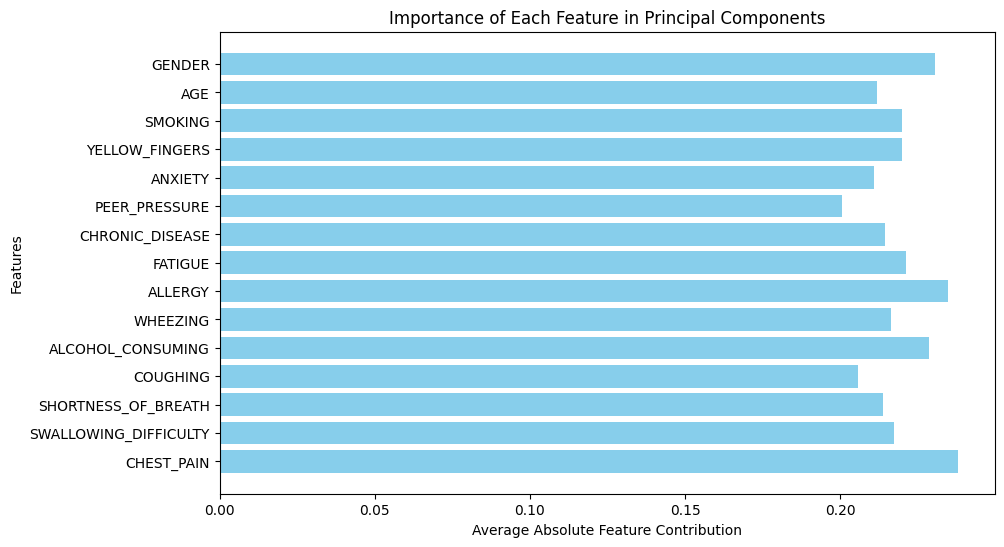

In [290]:
# Calculate absolute values of the components for visualization
abs_components = abs(pca.components_)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_column_names)), abs_components.mean(axis=0), color='skyblue')
plt.yticks(range(len(feature_column_names)), feature_column_names)
plt.xlabel('Average Absolute Feature Contribution')
plt.ylabel('Features')
plt.title('Importance of Each Feature in Principal Components')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


**Calculate Feature Importance**

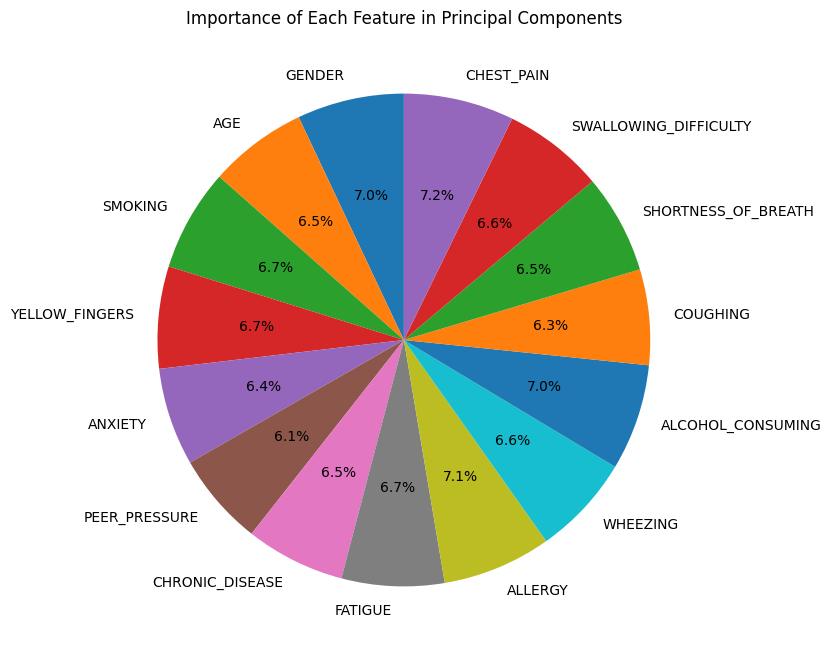

In [291]:
import matplotlib.pyplot as plt

# Calculate absolute values of the components for visualization
abs_components_sum = abs_components.mean(axis=0)
total_importance = abs_components_sum.sum()

# Calculate the proportion of importance for each feature
proportions = abs_components_sum / total_importance

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=feature_column_names, startangle=90, autopct='%1.1f%%')
plt.title('Importance of Each Feature in Principal Components')
plt.show()


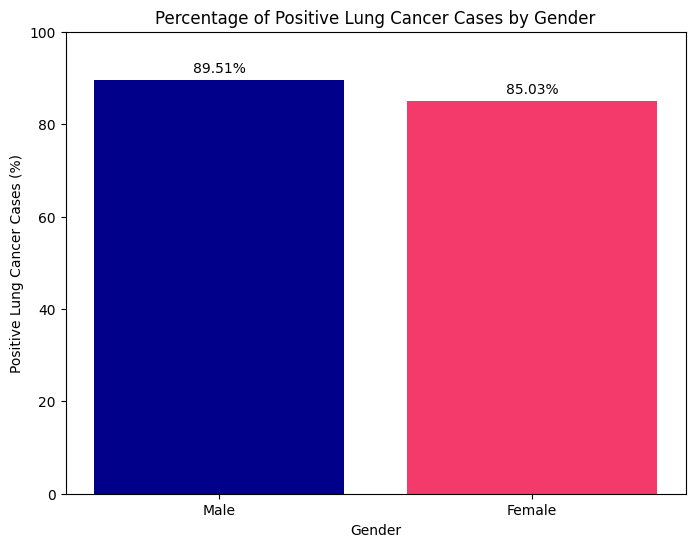

In [292]:
import matplotlib.pyplot as plt

# Convert gender numeric values to labels for plotting
gender_labels = {0: 'Female', 1: 'Male'}

# Calculate the percentage of positive lung cancer cases for each gender
positive_counts = data[data['LUNG_CANCER'] == 1]['GENDER'].value_counts()
total_counts = data['GENDER'].value_counts()
positive_percent = (positive_counts / total_counts) * 100

# Convert index from numeric to label
positive_percent.index = positive_percent.index.map(gender_labels)

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(positive_percent.index, positive_percent.values, color=['#00008B', '#F33A6A'])

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Positive Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Positive Lung Cancer Cases (%)')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.show()


/tmp/ipykernel_238140/1130196338.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Non Smoker', 'Smoker'])


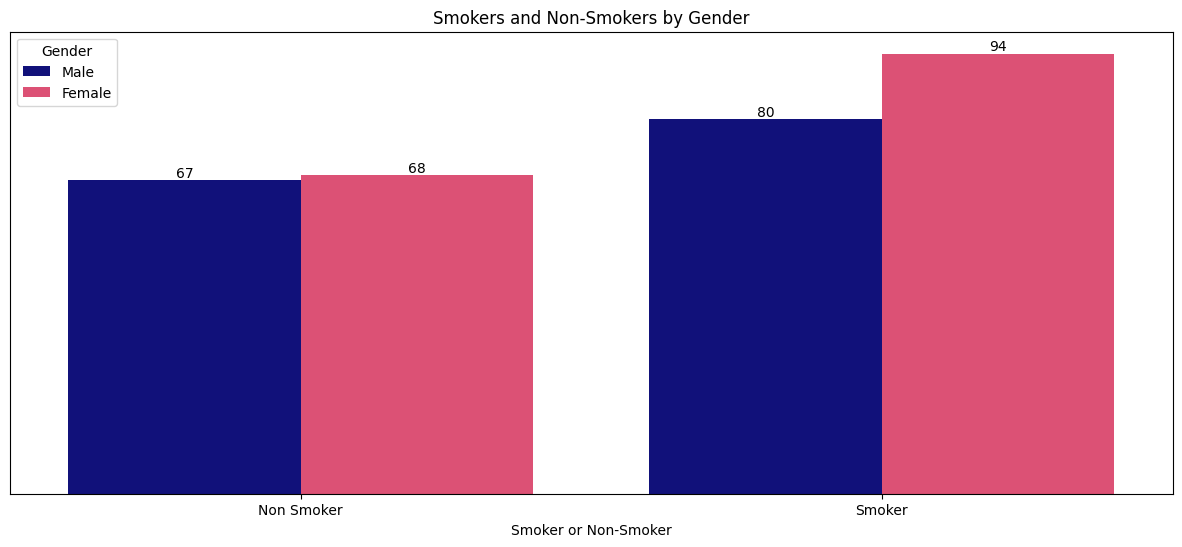

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette
pal = ['#00008B', '#F33A6A']

# Set figure size
plt.figure(figsize=(15, 6))

# Create count plot
a = sns.countplot(data=data, x='SMOKING', hue='GENDER', palette=pal)

# Add labels to bars
for container in a.containers:
    a.bar_label(container)

# Set plot title
plt.title('Smokers and Non-Smokers by Gender')

# Set legend title and labels
plt.legend(title='Gender', labels=['Male', 'Female'])

# Set x-axis labels
plt.gca().set_xticklabels(['Non Smoker', 'Smoker'])

# Hide y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Set x-axis label
plt.xlabel('Smoker or Non-Smoker')

# Show plot
plt.show()


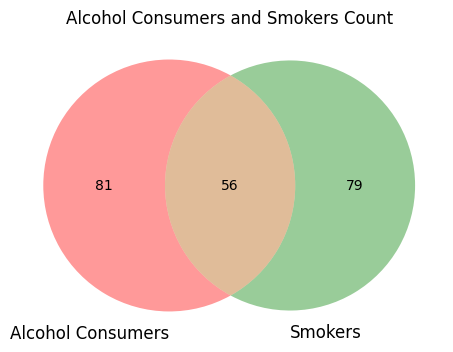

In [294]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Define sets for alcohol consumers and smokers
alcohol_consumers = set(data[data['ALCOHOL CONSUMING'] == 1].index)
smokers = set(data[data['SMOKING'] == 1].index)

# Create Venn diagram
plt.figure(figsize=(10, 4))
venn2([alcohol_consumers, smokers], ('Alcohol Consumers', 'Smokers'))

# Set title
plt.title('Alcohol Consumers and Smokers Count')

# Show plot
plt.show()


In [295]:
pip install matplotlib-venn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
